In [15]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import json
from MCForecastTools import MCSimulation

%matplotlib inline

In [16]:
# Load .env enviroment
load_dotenv()

True

In [5]:
## Part 1 - Personal Finance Planner

In [71]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [50]:
# Cypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"
btc_url = btc_url + "?format=json"
eth_url = eth_url + "?format=json"
btc_res = requests.get(btc_url)
eth_res = requests.get(eth_url)

In [51]:
btc_data = btc_res.json()
eth_data = eth_res.json()

In [52]:
btc_json_data = json.dumps(btc_data, indent=4)
print(btc_json_data)

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18515437,
            "total_supply": 18515437,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 11459.37,
                    "volume_24h": 21239055497,
                    "market_cap": 212199790088,
                    "percentage_change_1h": -0.573739571244248,
                    "percentage_change_24h": 0.798984291311063,
                    "percentage_change_7d": 6.25332583000349,
                    "percent_change_1h": -0.573739571244248,
                    "percent_change_24h": 0.798984291311063,
                    "percent_change_7d": 6.25332583000349
                }
            },
            "last_updated": 1602552562
        }
    },
    "metadata": {
        "timestamp": 1602552562,
        "num_cr

In [53]:
eth_json_data = json.dumps(eth_data, indent=4)
print(eth_json_data)

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 112982152,
            "total_supply": 112982152,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 383.95,
                    "volume_24h": 12379648405,
                    "market_cap": 43433663473,
                    "percentage_change_1h": -0.704515481795004,
                    "percentage_change_24h": 2.74381456132579,
                    "percentage_change_7d": 8.58234465450249,
                    "percent_change_1h": -0.704515481795004,
                    "percent_change_24h": 2.74381456132579,
                    "percent_change_7d": 8.58234465450249
                }
            },
            "last_updated": 1602552586
        }
    },
    "metadata": {
        "timestamp": 1602552586,
        "num_cryp

In [54]:
# Fetch current BTC price
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
print(btc_price)

11459.37


In [55]:
# Fetch current ETH prics
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]
print(eth_price)

383.95


In [73]:
# Compute current value of my crypto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
print(my_btc_value)
print(my_eth_value)

13751.244
2034.935


In [75]:
# print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value}")

The current value of your 1.2 BTC is $13751.244
The current value of your 5.3 ETH is $2034.935


In [76]:
## Collect Investments Data Using Alpaca: SPY(stocks) and AGG (bonds)

In [147]:
# Current amount of shares
shares_data = {"shares": [200, 50]}

In [148]:
# Set alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [149]:
# Verify that Aplaca key and secret were correctly loaded
print(f"Alpaca Key Type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key Type: {type(alpaca_secret_key)}")

Alpaca Key Type: <class 'str'>
Alpaca Secret Key Type: <class 'str'>


In [150]:
# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

In [151]:
# Format current date as ISO format
today = pd.Timestamp("2020-10-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
df_ticker = alpaca.get_barset(tickers, timeframe, start=today, end=today).df

# Preview DataFrame
df_ticker.head()

AGG                                      SPY  \
                             open    high    low    close   volume    open   
2020-10-09 00:00:00-04:00  117.65  117.74  117.5  117.705  2750029  345.56   

                                                             
                             high     low   close    volume  
2020-10-09 00:00:00-04:00  347.35  344.89  346.84  45969566

In [152]:
# Pick AGG and SPY close prices
agg_close_price = float(df_ticker["AGG"]["close"])
spy_close_price = float(df_ticker["SPY"]["close"])

# print AGg and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $117.705
Current SPY closing price: $346.84


In [155]:
# Compute the current value of shares
df_shares = pd.DataFrame(shares_data, index=tickers)

agg_value = agg_close_price * df_shares.loc["AGG"]["shares"]
spy_value = spy_close_price * df_shares.loc["SPY"]["shares"]
# Print current value of share
print(f"The current value of the {df_shares.loc['AGG']['shares']} AGG shares is ${agg_value:0.2f}")
print(f"The current value of the {df_shares.loc['SPY']['shares']} SPY shares is ${spy_value:0.2f}")

The current value of the 200 AGG shares is $23541.00
The current value of the 50 SPY shares is $17342.00


In [94]:
## Savings Health Analysis 

In [226]:
# Set monthly household income
monthly_income = 1200

# Create savings DataFrame
crypto_total = my_btc_value + my_eth_value
shares_total = spy_value + agg_value

value_data = {"":['crypto', 'shares'], "Amount": [crypto_total, shares_total]}

df_savings = pd.DataFrame(value_data)

df_savings = df_savings.set_index("")

# Display savings DataFrame
print(df_savings)

           Amount
                 
crypto  15786.179
shares  40883.000


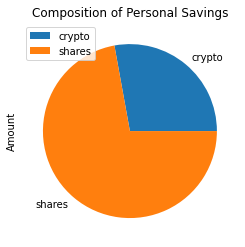

In [229]:
# Plot savings pie chart
df_savings.plot.pie(y="Amount", title="Composition of Personal Savings")

In [249]:
# Set ideal emergency fund
emergency_fund = monthly_income *3

# Calculate total amount of savings 
total_savings = crypto + shares

emergency_fund_difference = emergency_fund - total_savings

# Validate saving health
if total_savings >= emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.") 
else:
    print("You are ${emergency_fund_difference} away from reaching your goal.")
    

Congratulations! You have enough money in your emergency fund.


In [231]:
## Part 2 - Retirement Planning

In [250]:
# Set start and end dates of five years back from today. 
# Sample results may vary from the solution based on the time frame chosen
start_date_retirement = pd.Timestamp('2015-10-14', tz='America/New_York').isoformat()
end_date_retirement = pd.Timestamp('2020-10-14', tz='America/New_York').isoformat()

In [256]:
# Get 5 years' worth of historical date for SPY and AGG
df_ticker_retirement = alpaca.get_barset(tickers, timeframe, start=start_date_retirement, end=end_date_retirement).df

# Display sample data
df_ticker_retirement.head()

AGG                                       \
                             open      high       low   close   volume   
2015-10-14 00:00:00-04:00  109.83  110.0500  109.7251  110.03  3785661   
2015-10-15 00:00:00-04:00  109.93  110.0499  109.7900  109.89  1792325   
2015-10-16 00:00:00-04:00  109.90  109.9400  109.7800  109.78  1497588   
2015-10-19 00:00:00-04:00  109.78  109.8950  109.6500  109.85  1289942   
2015-10-20 00:00:00-04:00  109.64  109.7800  109.5500  109.65  1672562   

                              SPY                                      
                             open    high       low   close    volume  
2015-10-14 00:00:00-04:00  200.18  200.87  198.9400  199.27  82856686  
2015-10-15 00:00:00-04:00  200.08  202.34  199.6400  202.33  96008389  
2015-10-16 00:00:00-04:00  202.83  203.29  201.9200  203.14  79323870  
2015-10-19 00:00:00-04:00  202.50  203.37  202.1300  203.33  61255929  
2015-10-20 00:00:00-04:00  202.85  203.84  202.5471  203.07  60081395